# Test Chart Component Detection Modules

Notebook này test các module:
1. **ImagePreprocessor**: Tiền xử lý ảnh (denoise, enhance contrast, binarize, edge detection)
2. **ChartComponentDetector**: Phát hiện axes, bars, colors, text regions

## Modules được test:
- `src.preprocessing.image_utils.ImagePreprocessor`
- `src.preprocessing.chart_detector.ChartComponentDetector`

In [13]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import cv2

# Add project root to path
notebook_dir = Path().resolve()
project_root = notebook_dir.parent  # bleh/
sys.path.insert(0, str(project_root))

from src.preprocessing.image_utils import ImagePreprocessor
from src.preprocessing.chart_detector import ChartComponentDetector

print(f"Project root: {project_root}")
print(f"    Imported ImagePreprocessor")
print(f"    Imported ChartComponentDetector")

Project root: C:\Homework\Code File\Python Code File\iView\Chart-understanding\bleh
    Imported ImagePreprocessor
    Imported ChartComponentDetector


## 1. Khởi tạo và test ImagePreprocessor

In [14]:
preprocessor = ImagePreprocessor()

# Chọn một ảnh để test
bar_charts_dir = project_root / "data" / "raw" / "bar_charts"
image_paths = sorted(bar_charts_dir.glob("chart_*.png"))

if len(image_paths) > 0:
    test_image_path = image_paths[0]
    print(f"Testing với: {test_image_path.name}")
    
    # Load và preprocess
    original = preprocessor.load_image(str(test_image_path))
    preprocessed = preprocessor.preprocess_pipeline(str(test_image_path))
    
    print(f"Original shape: {original.shape}")
    print(f"Preprocessed shape: {preprocessed.shape}")
else:
    print("Không tìm thấy ảnh bar chart trong data/raw/bar_charts/")

Testing với: chart_0000.png
Original shape: (1946, 800, 3)
Preprocessed shape: (1946, 800, 3)


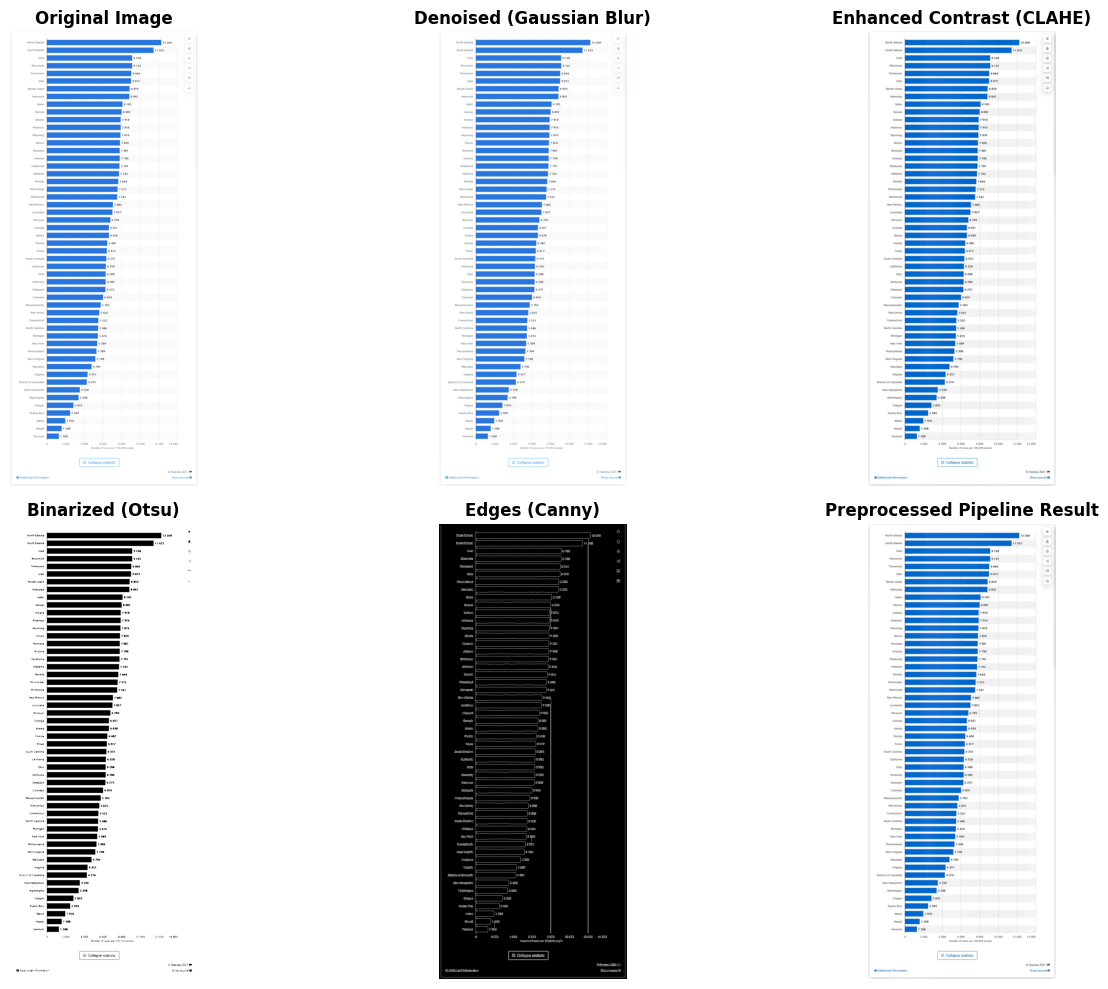

In [15]:
# Visualize preprocessing results
if len(image_paths) > 0:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    # Original
    axes[0, 0].imshow(original)
    axes[0, 0].set_title("Original Image", fontsize=12, fontweight='bold')
    axes[0, 0].axis('off')
    
    # Denoised
    denoised = preprocessor.remove_noise(original)
    axes[0, 1].imshow(denoised)
    axes[0, 1].set_title("Denoised (Gaussian Blur)", fontsize=12, fontweight='bold')
    axes[0, 1].axis('off')
    
    # Enhanced contrast
    enhanced = preprocessor.enhance_contrast(denoised)
    axes[0, 2].imshow(enhanced)
    axes[0, 2].set_title("Enhanced Contrast (CLAHE)", fontsize=12, fontweight='bold')
    axes[0, 2].axis('off')
    
    # Binarized
    binary = preprocessor.binarize(enhanced, method='otsu')
    axes[1, 0].imshow(binary, cmap='gray')
    axes[1, 0].set_title("Binarized (Otsu)", fontsize=12, fontweight='bold')
    axes[1, 0].axis('off')
    
    # Edges
    edges = preprocessor.detect_edges(enhanced)
    axes[1, 1].imshow(edges, cmap='gray')
    axes[1, 1].set_title("Edges (Canny)", fontsize=12, fontweight='bold')
    axes[1, 1].axis('off')
    
    # Preprocessed pipeline result
    axes[1, 2].imshow(preprocessed)
    axes[1, 2].set_title("Preprocessed Pipeline Result", fontsize=12, fontweight='bold')
    axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Không có ảnh để hiển thị")

## 2. Test ChartComponentDetector - Phát hiện Axes

In [16]:
# Khởi tạo detector
detector = ChartComponentDetector(preprocessor)

# Detect axes
if len(image_paths) > 0:
    x_axis, y_axis = detector.detect_axes(preprocessed)
    
    print("Kết quả phát hiện axes:")
    if x_axis:
        print(f"✓ X-axis (bottom): {x_axis}")
    else:
        print("✗ Không phát hiện X-axis")
    
    if y_axis:
        print(f"✓ Y-axis (left): {y_axis}")
    else:
        print("✗ Không phát hiện Y-axis")
else:
    print("Không có ảnh để test")

Kết quả phát hiện axes:
✓ X-axis (bottom): (11, 1938, 789, 1938)
✓ Y-axis (left): (8, 1936, 8, 10)


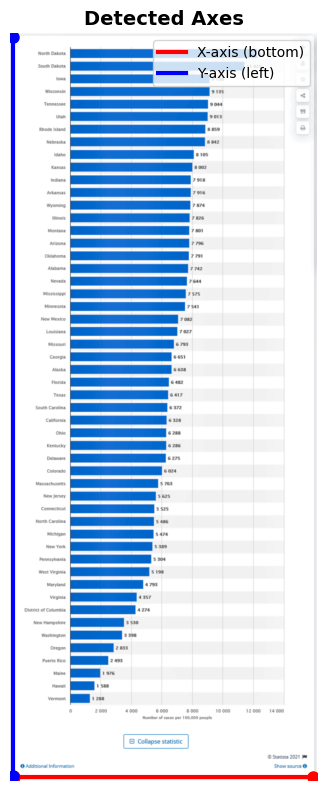

In [17]:
# Visualize axes detection
if len(image_paths) > 0 and (x_axis or y_axis):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(preprocessed)
    ax.set_title("Detected Axes", fontsize=14, fontweight='bold')
    
    # Draw X-axis (bottom horizontal line)
    if x_axis:
        x1, y1, x2, y2 = x_axis
        ax.plot([x1, x2], [y1, y2], 'r-', linewidth=3, label='X-axis (bottom)')
        ax.plot(x1, y1, 'ro', markersize=8)
        ax.plot(x2, y2, 'ro', markersize=8)
    
    # Draw Y-axis (left vertical line)
    if y_axis:
        x1, y1, x2, y2 = y_axis
        ax.plot([x1, x2], [y1, y2], 'b-', linewidth=3, label='Y-axis (left)')
        ax.plot(x1, y1, 'bo', markersize=8)
        ax.plot(x2, y2, 'bo', markersize=8)
    
    ax.legend(loc='upper right', fontsize=10)
    ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Không có axes để hiển thị")

## 3. Test ChartComponentDetector - Phát hiện Bars

In [18]:
# Detect bars
if len(image_paths) > 0:
    bars = detector.detect_bars(preprocessed, x_axis=x_axis, y_axis=y_axis)
    
    print(f"✓ Phát hiện {len(bars)} bars")
    print("\nThông tin các bars (left to right):")
    for i, bar in enumerate(bars, 1):
        bbox = bar['bbox']
        center = bar['center']
        area = bar['area']
        print(f"  Bar {i}: bbox={bbox}, center={center}, area={area:.1f}px²")
else:
    print("Không có ảnh để test")

✓ Phát hiện 1 bars

Thông tin các bars (left to right):
  Bar 1: bbox=(156, 37, 489, 1713), center=(300, 732), area=324496.0px²


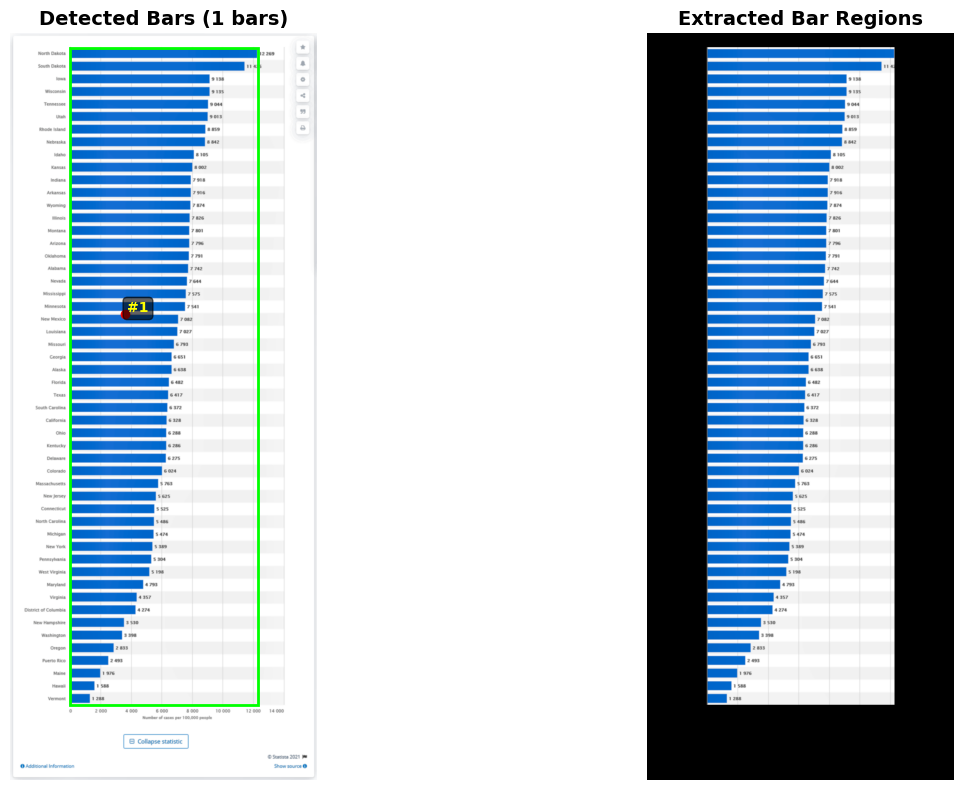

In [19]:
# Visualize detected bars
if len(image_paths) > 0 and len(bars) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Original image with bar bounding boxes
    axes[0].imshow(preprocessed)
    axes[0].set_title(f"Detected Bars ({len(bars)} bars)", fontsize=14, fontweight='bold')
    
    for i, bar in enumerate(bars):
        x, y, w, h = bar['bbox']
        center = bar['center']
        
        # Draw bounding box
        rect = patches.Rectangle((x, y), w, h, linewidth=2, 
                                edgecolor='lime', facecolor='none')
        axes[0].add_patch(rect)
        
        # Draw center point
        axes[0].plot(center[0], center[1], 'ro', markersize=6)
        axes[0].text(center[0] + 5, center[1] - 5, f'#{i+1}', 
                    color='yellow', fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='black', alpha=0.6))
    
    axes[0].axis('off')
    
    # Bars only (mask)
    mask_img = np.zeros_like(preprocessed)
    for bar in bars:
        x, y, w, h = bar['bbox']
        mask_img[y:y+h, x:x+w] = preprocessed[y:y+h, x:x+w]
    
    axes[1].imshow(mask_img)
    axes[1].set_title("Extracted Bar Regions", fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Không có bars để hiển thị")

## 4. Test Extract Bar Colors

✓ Trích xuất màu cho 1 bars

Màu RGB của từng bar:
  Bar 1: RGB(254, 254, 254)


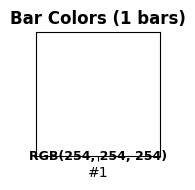

In [20]:
# Extract bar colors
if len(image_paths) > 0 and len(bars) > 0:
    colors = detector.extract_bar_colors(preprocessed, bars)
    
    print(f"✓ Trích xuất màu cho {len(colors)} bars")
    print("\nMàu RGB của từng bar:")
    for i, (bar, color) in enumerate(zip(bars, colors), 1):
        print(f"  Bar {i}: RGB{color}")
    
    # Visualize colors
    fig, ax = plt.subplots(1, 1, figsize=(12, 2))
    color_swatches = np.array([list(color) for color in colors]).reshape(1, len(colors), 3) / 255.0
    
    ax.imshow(color_swatches)
    ax.set_title(f"Bar Colors ({len(colors)} bars)", fontsize=12, fontweight='bold')
    ax.set_xticks(range(len(colors)))
    ax.set_xticklabels([f'#{i+1}' for i in range(len(colors))])
    ax.set_yticks([])
    
    # Add RGB values as text
    for i, color in enumerate(colors):
        ax.text(i, 0.5, f'RGB{color}', ha='center', va='center', 
               color='white' if sum(color) < 384 else 'black',
               fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print("Không có bars để extract colors")

## 5. Test Detect Text Regions

In [21]:
# Detect text regions
if len(image_paths) > 0:
    text_regions = detector.detect_text_regions(preprocessed)
    
    print(f"✓ Phát hiện {len(text_regions)} text regions")
    if len(text_regions) > 0:
        print("\nThông tin các text regions (top to bottom, left to right):")
        for i, bbox in enumerate(text_regions[:10], 1):  # Show first 10
            x, y, w, h = bbox
            print(f"  Region {i}: bbox=({x}, {y}, {w}, {h}), area={w*h}px²")
        if len(text_regions) > 10:
            print(f"  ... và {len(text_regions) - 10} regions khác")
else:
    print("Không có ảnh để test")

✓ Phát hiện 14 text regions

Thông tin các text regions (top to bottom, left to right):
  Region 1: bbox=(745, 26, 36, 22), area=792px²
  Region 2: bbox=(25, 30, 678, 1747), area=1184466px²
  Region 3: bbox=(744, 67, 38, 25), area=950px²
  Region 4: bbox=(745, 109, 37, 24), area=888px²
  Region 5: bbox=(745, 151, 37, 24), area=888px²
  Region 6: bbox=(744, 193, 38, 18), area=684px²
  Region 7: bbox=(744, 241, 37, 16), area=592px²
  Region 8: bbox=(209, 1755, 57, 22), area=1254px²
  Region 9: bbox=(288, 1755, 299, 40), area=11960px²
  Region 10: bbox=(603, 1755, 124, 22), area=2728px²
  ... và 4 regions khác


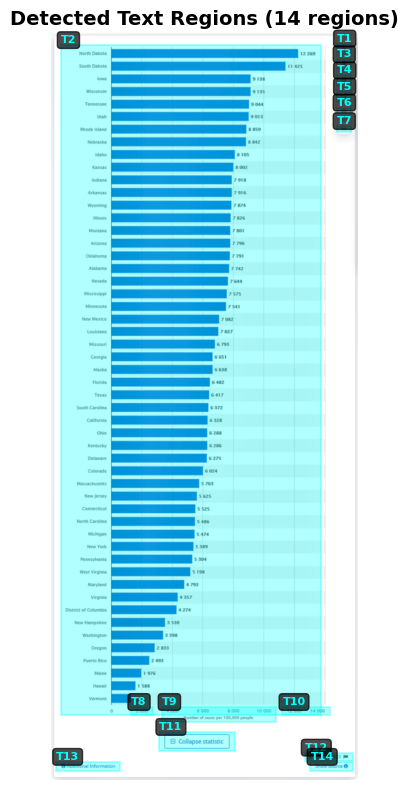

In [22]:
# Visualize text regions
if len(image_paths) > 0 and len(text_regions) > 0:
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(preprocessed)
    ax.set_title(f"Detected Text Regions ({len(text_regions)} regions)", 
                fontsize=14, fontweight='bold')
    
    # Draw bounding boxes for text regions (limit to 50 for clarity)
    for i, bbox in enumerate(text_regions[:50]):
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=1.5, 
                                edgecolor='cyan', facecolor='cyan', alpha=0.3)
        ax.add_patch(rect)
        if i < 20:  # Label first 20 regions
            ax.text(x, y - 5, f'T{i+1}', color='cyan', fontsize=8, fontweight='bold',
                   bbox=dict(boxstyle='round', facecolor='black', alpha=0.7))
    
    ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Không có text regions để hiển thị")

## 6. Test trên nhiều ảnh khác nhau

In [23]:
# Test trên 5 ảnh đầu tiên
num_test_images = min(5, len(image_paths))
print(f"Test trên {num_test_images} ảnh đầu tiên:\n")

results = []
for i, img_path in enumerate(image_paths[:num_test_images], 1):
    print(f"Processing {i}/{num_test_images}: {img_path.name}")
    
    # Preprocess
    img_preprocessed = preprocessor.preprocess_pipeline(str(img_path))
    
    # Detect axes
    x_ax, y_ax = detector.detect_axes(img_preprocessed)
    
    # Detect bars
    bars_detected = detector.detect_bars(img_preprocessed, x_axis=x_ax, y_axis=y_ax)
    
    results.append({
        'image': img_path.name,
        'x_axis': x_ax is not None,
        'y_axis': y_ax is not None,
        'num_bars': len(bars_detected),
    })
    
    print(f"  ✓ X-axis: {'Found' if x_ax else 'Not found'}")
    print(f"  ✓ Y-axis: {'Found' if y_ax else 'Not found'}")
    print(f"  ✓ Bars: {len(bars_detected)} detected\n")

# Summary
print("=" * 50)
print("SUMMARY:")
print("=" * 50)
for r in results:
    print(f"{r['image']}: X={r['x_axis']}, Y={r['y_axis']}, Bars={r['num_bars']}")

Test trên 5 ảnh đầu tiên:

Processing 1/5: chart_0000.png
  ✓ X-axis: Found
  ✓ Y-axis: Found
  ✓ Bars: 1 detected

Processing 2/5: chart_0001.png
  ✓ X-axis: Found
  ✓ Y-axis: Found
  ✓ Bars: 1 detected

Processing 3/5: chart_0002.png
  ✓ X-axis: Found
  ✓ Y-axis: Found
  ✓ Bars: 1 detected

Processing 4/5: chart_0003.png
  ✓ X-axis: Found
  ✓ Y-axis: Found
  ✓ Bars: 1 detected

Processing 5/5: chart_0004.png
  ✓ X-axis: Found
  ✓ Y-axis: Found
  ✓ Bars: 2 detected

SUMMARY:
chart_0000.png: X=True, Y=True, Bars=1
chart_0001.png: X=True, Y=True, Bars=1
chart_0002.png: X=True, Y=True, Bars=1
chart_0003.png: X=True, Y=True, Bars=1
chart_0004.png: X=True, Y=True, Bars=2


## 7. Visualization tổng hợp - Tất cả components trên một ảnh

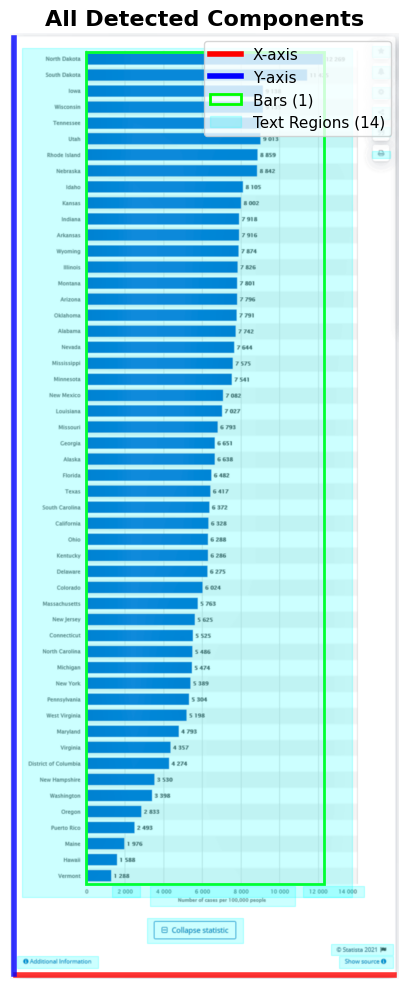

In [24]:
# Visualize tất cả components trên ảnh đầu tiên
if len(image_paths) > 0:
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    ax.imshow(preprocessed)
    ax.set_title("All Detected Components", fontsize=16, fontweight='bold')
    
    # Draw X-axis
    if x_axis:
        x1, y1, x2, y2 = x_axis
        ax.plot([x1, x2], [y1, y2], 'r-', linewidth=4, label='X-axis', alpha=0.8)
    
    # Draw Y-axis
    if y_axis:
        x1, y1, x2, y2 = y_axis
        ax.plot([x1, x2], [y1, y2], 'b-', linewidth=4, label='Y-axis', alpha=0.8)
    
    # Draw bars
    for i, bar in enumerate(bars):
        x, y, w, h = bar['bbox']
        rect = patches.Rectangle((x, y), w, h, linewidth=2, 
                                edgecolor='lime', facecolor='none')
        ax.add_patch(rect)
    
    # Draw text regions (limit to 30 for clarity)
    for bbox in text_regions[:30]:
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=1, 
                                edgecolor='cyan', facecolor='cyan', alpha=0.2)
        ax.add_patch(rect)
    
    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='red', lw=4, label='X-axis'),
        Line2D([0], [0], color='blue', lw=4, label='Y-axis'),
        patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='lime', 
                         facecolor='none', label=f'Bars ({len(bars)})'),
        patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='cyan', 
                         facecolor='cyan', alpha=0.2, label=f'Text Regions ({len(text_regions)})'),
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=11)
    
    ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Không có ảnh để hiển thị")